# Basic operations

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import session_info
session_info.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords as sw
stop_words=stopwords.words('english')
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from os import walk
from pympler import asizeof

In [14]:
mypath = os.getcwd()
all_files = []
for (dirpath, dirnames, filenames) in walk(mypath):
    all_files.extend(filenames)
    break
all_files.remove('Code.ipynb')
all_files.remove('requirements.txt')
all_files.remove('Class_NGrams.py')
all_files.remove('Class_TxtAnalysis.py')
all_files.remove('TestClass_delete_me.py')
all_files

['01_21.txt',
 '02_21.txt',
 '03_21.txt',
 '04_21.txt',
 '05_21.txt',
 '06_21.txt',
 '07_21.txt',
 '08_21.txt',
 '09_21.txt',
 '10_21.txt',
 '11_21.txt',
 '12_21.txt']

In [15]:
def opentxtfile(filename):
    with open(filename,'r') as f:
        lines = [line.strip() for line in f if line.strip()]
        transcripts=''.join(lines)        
    return transcripts

In [16]:
all_speeches = []*len(all_files)
for f in all_files: 
    file= opentxtfile(f)
    all_speeches.append(file)
all_speeches = ''.join(all_speeches)

In [17]:
def cleaning_transcripts(transcripts):
    transcripts = transcripts.lower()
    transcripts = re.sub('\((.*?\))', '', transcripts)
    transcripts = re.sub('\[.*?\]', '', transcripts)
    transcripts = re.sub('[%s]' % re.escape(string.punctuation), '', transcripts)
    transcripts = re.sub('\w*\d\w*', '', transcripts)
    return transcripts

In [19]:
cleaned_speeches = cleaning_transcripts(all_speeches)

In [20]:
def remove_stopwords(transcripts):
    tokenized_transcripts=word_tokenize(transcripts)
    transcripts_wo_stopwords= [w for w in tokenized_transcripts if not w in stop_words] 
    transcripts_wo_stopwords=' '.join(transcripts_wo_stopwords)    
    return transcripts_wo_stopwords

In [22]:
cleaned_speeches = remove_stopwords(cleaned_speeches)

In [23]:
def word_cloud(name,transcript,color_map,x):
    wc = WordCloud(stopwords=stop_words, width = 300, height = 250,background_color="white", colormap=color_map,
                   max_font_size=75, random_state=60)
    plt.rcParams['figure.figsize'] = [x,x]
    wc.generate(transcript)
    plt.subplot(3,4,3)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(name)
    plt.show()

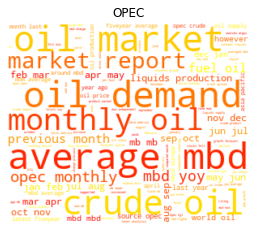

In [24]:
word_cloud('OPEC',cleaned_speeches,'autumn',20)

In [25]:
df_transcripts=pd.DataFrame({"Transcripts" :([cleaned_speeches]) }, index=['OPEC'])
df_transcripts

,Transcripts
OPEC,january feature article monetary policies impa...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_transcripts.Transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_transcripts.index
data = data_dtm
data = data.transpose()

In [28]:
top_words=[]
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'OPEC': [('mbd', 7205),
  ('oil', 6268),
  ('crude', 3886),
  ('opec', 3781),
  ('average', 3257),
  ('yoy', 3178),
  ('demand', 3174),
  ('mb', 2793),
  ('month', 2486),
  ('mom', 2449),
  ('production', 2445),
  ('growth', 2253),
  ('market', 1998),
  ('forecast', 1845),
  ('total', 1730),
  ('oecd', 1716),
  ('monthly', 1677),
  ('year', 1671),
  ('product', 1471),
  ('tbd', 1459),
  ('supply', 1445),
  ('compared', 1442),
  ('fuel', 1429),
  ('higher', 1410),
  ('sources', 1399),
  ('liquids', 1329),
  ('lower', 1311),
  ('world', 1211),
  ('rose', 1209),
  ('report', 1152),
  ('china', 1148),
  ('graph', 1137),
  ('stocks', 1117),
  ('change', 1106),
  ('europe', 1105),
  ('previous', 1065),
  ('asia', 1052),
  ('gasoline', 1042),
  ('jan', 1022),
  ('sep', 1013),
  ('apr', 1001),
  ('mar', 1000),
  ('jul', 997),
  ('aug', 979),
  ('feb', 975),
  ('jun', 974),
  ('oct', 967),
  ('prices', 958),
  ('nov', 958),
  ('dec', 957)]}

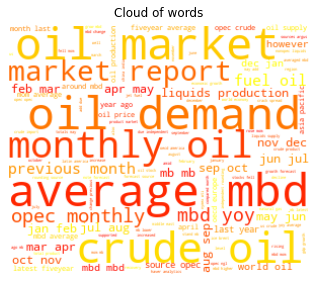

In [29]:
word_cloud('Cloud of words',cleaned_speeches,'autumn',25)

In [ ]:
# Le prb c'est que l'on perd la trace des dates des speeches ! 
# Du coup quand on met dans un data frame ça donne ça : 

In [30]:
df_transcripts=pd.DataFrame({"Transcripts" :([cleaned_speeches]) }, index=['OPEC'])
df_transcripts

,Transcripts
OPEC,january feature article monetary policies impa...


In [31]:
all_speeches = []*len(all_files)
df_speeches = []
# on ouvre, def un df et on l'append
for f in all_files: 
    file=opentxtfile(f)
    df_speeches_=pd.DataFrame({"Transcripts" :([file]) }, index=[f])
    df_speeches.append(df_speeches_)
df_speeches[1] # on garde la trace des dates 

,Transcripts
02_21.txt,11 February 2021 Feature article: Review of gl...


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_transcripts.Transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_transcripts.index
data = data_dtm
data = data.transpose()
data

,OPEC
aalqahtaniopecorg,12
aand,1
abate,4
abated,3
abbreviations,24
...,...
zeta,5
zhejiang,1
zhenhua,1
zinc,12


In [33]:
top_words=[]
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{'OPEC': [('mbd', 7205),
  ('oil', 6268),
  ('crude', 3886),
  ('opec', 3781),
  ('average', 3257),
  ('yoy', 3178),
  ('demand', 3174),
  ('mb', 2793),
  ('month', 2486),
  ('mom', 2449)]}

# N-Grams

In [34]:
import pandas as pd
import numpy as np

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

from string import punctuation
punctuation = punctuation[0:5]+punctuation[7:]
import math
import random

# First N-grams using NLTK

In [35]:
import re
from nltk.util import ngrams

In [37]:
data = cleaned_speeches.lower()
data = re.sub(r'[^a-zA-Z0-9\s]', ' ', data)
tokens = [token for token in data.split(" ") if token != ""]
output = list(ngrams(tokens, 5))
output[1:10] # not very good ... 

[('feature', 'article', 'monetary', 'policies', 'impact'),
 ('article', 'monetary', 'policies', 'impact', 'oil'),
 ('monetary', 'policies', 'impact', 'oil', 'market'),
 ('policies', 'impact', 'oil', 'market', 'oil'),
 ('impact', 'oil', 'market', 'oil', 'market'),
 ('oil', 'market', 'oil', 'market', 'highlights'),
 ('market', 'oil', 'market', 'highlights', 'feature'),
 ('oil', 'market', 'highlights', 'feature', 'article'),
 ('market', 'highlights', 'feature', 'article', 'iii')]

In [ ]:
# Still an ongoing project!Check https://www.projectpro.io/recipes/find-ngrams-from-text